In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100453,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095213,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088224,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090408,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093029,73449600


In [3]:
df.shape

(10336, 7)

Too much data for a stock price problem , that's why dropping most of it

In [175]:
df1= df.drop(df.index[0:5000],axis=0)
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5000,2000-09-25,0.941964,0.991071,0.929688,0.955357,0.819090,435551200
5001,2000-09-26,0.952009,0.977679,0.917411,0.918527,0.787513,290936800
5002,2000-09-27,0.924107,0.941964,0.861607,0.873884,0.749238,402259200
5003,2000-09-28,0.880580,0.960938,0.859375,0.955357,0.819090,979585600
5004,2000-09-29,0.503348,0.517857,0.453125,0.459821,0.394234,7421640800


In [176]:
df1.reset_index(drop=True, inplace=True)
df1.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-09-25,0.941964,0.991071,0.929688,0.955357,0.819090,435551200
1,2000-09-26,0.952009,0.977679,0.917411,0.918527,0.787513,290936800
2,2000-09-27,0.924107,0.941964,0.861607,0.873884,0.749238,402259200
3,2000-09-28,0.880580,0.960938,0.859375,0.955357,0.819090,979585600
4,2000-09-29,0.503348,0.517857,0.453125,0.459821,0.394234,7421640800
5,2000-10-02,0.476563,0.477679,0.419643,0.433036,0.371270,2424788800
6,2000-10-03,0.445313,0.446429,0.396205,0.398438,0.341607,2038120000
7,2000-10-04,0.399554,0.424107,0.390625,0.421875,0.361701,1466024000
8,2000-10-05,0.419643,0.437500,0.392857,0.393973,0.337779,873006400
9,2000-10-06,0.405134,0.409598,0.375000,0.396205,0.339692,612656800


In [177]:
# here we're only going to work with the closing value for the day 

df2 = df1['Close']

In [178]:
df2.head()

0    0.955357
1    0.918527
2    0.873884
3    0.955357
4    0.459821
Name: Close, dtype: float64

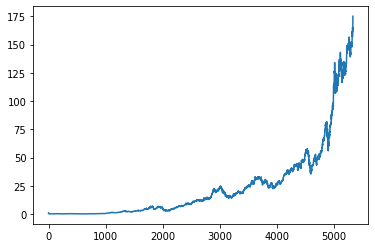

In [179]:
import matplotlib.pyplot as plt

plt.plot(df2)

**Since LSTM is sensitive to data distribution,we'll scale it using MinMax**

In [180]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df2= scaler.fit_transform(np.array(df2).reshape(-1,1))
#Reshape to 2D array using NP otherwise it'll show this error 
# "Expected 2D array, got 1D array instead:""

print(df2)

[[0.00412404]
 [0.0039134 ]
 [0.00365807]
 ...
 [0.94417939]
 [0.97769457]
 [1.        ]]


**Now our dataset is in np array mode and we need to split it.** 
**But since it's a timeseries problem,we need to take the sequence into account**


In [181]:
train_size =  int(len(df2)*0.65) 
# 65% of data == training size
test_size = len(df2)-train_size

train_data , test_data = df2[0:train_size], df2[train_size:len(df2)]


In [182]:
train_size,test_size

(3468, 1868)

In [183]:
train_data[0:10]

array([[0.00412404],
       [0.0039134 ],
       [0.00365807],
       [0.00412404],
       [0.00128991],
       [0.00113672],
       [0.00093884],
       [0.00107288],
       [0.0009133 ],
       [0.00092607]])

In [184]:
test_data[0:10]

array([[0.13480864],
       [0.13656733],
       [0.13495163],
       [0.13417952],
       [0.1317631 ],
       [0.13367908],
       [0.13297847],
       [0.13409373],
       [0.13762542],
       [0.13739664]])

Now we need to process the data for a timeseries problem . 
For a timestep, we need to take that amount of data into consideration and have a test
dataset to validate the next timestep data .
which means, 
if X= 1,2,3,4,5 and timesetep is 3 , 
take 1,2,3 into account to predit 4 , so 4 needs to be on Y .
It'll keeep on going , one setp at a time

In [185]:
def create_dataset(dataset,time_step):
    X,Y=[],[]
    for i in range (len(dataset)-time_step-1):
        # for 100 data with 10 ts,it'll visit 0 to 89,otherwise the last few lines of data will have uneven data count
        a= dataset[i:(i+time_step),0] #the timestep we're subtracting from loop is accounted here 
        X.append(a)
        Y.append(dataset[i+time_step,0])
    return np.array(X),np.array(Y)
        

In [186]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [187]:
print(X_train.shape)
print(y_train.shape)

(3367, 100)
(3367,)


**LSTM needs 3D data as input so, we need to reshape the data**

source-  https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

In [188]:
# adding an extra dimention 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape)


(3367, 100, 1)


**Now we're going to make our model with stacked LSTM**

In [189]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

Keras LSTM documentation = https://keras.io/api/layers/recurrent_layers/lstm/
NOTE: 
    That **return sequences** return the hidden state output for each input time step.
    That **return state** returns the hidden state output and cell state for the last input time step.
    That return sequences and return state can be used at the same time.


Generally, we do not need to access the cell state unless we are developing sophisticated models where subsequent layers may need to have their cell state initialized with the final cell state of another layer, such as in an encoder-decoder model.



In [190]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,)) 
#You must set return_sequences=True when stacking LSTM layers so that 
#the second LSTM layer has a three-dimensional sequence input.
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Useful article for LSTM return seq** = https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

In [191]:
model.fit(X_train,y_train,validation_data=
          (X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
53/53 [==============================] - 13s 157ms/step - loss: 2.4197e-04 - val_loss: 0.0018
Epoch 2/100
53/53 [==============================] - 7s 122ms/step - loss: 1.0725e-05 - val_loss: 0.0024
Epoch 3/100
53/53 [==============================] - 7s 135ms/step - loss: 9.7760e-06 - val_loss: 0.0029
Epoch 4/100
53/53 [==============================] - 8s 149ms/step - loss: 9.2464e-06 - val_loss: 0.0032
Epoch 5/100
53/53 [==============================] - 7s 139ms/step - loss: 9.0799e-06 - val_loss: 0.0036
Epoch 6/100
53/53 [==============================] - 7s 140ms/step - loss: 8.2616e-06 - val_loss: 0.0039
Epoch 7/100
53/53 [==============================] - 8s 142ms/step - loss: 7.7890e-06 - val_loss: 0.0032
Epoch 8/100
53/53 [==============================] - 8s 143ms/step - loss: 8.2373e-06 - val_loss: 0.0046
Epoch 9/100
53/53 [==============================] - 7s 139ms/step - loss: 8.9666e-06 - val_loss: 0.0035
Epoch 10/100
53/53 [==============================] - 

**Now that the model is trained, let's try to plot our predictions**

In [192]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

We did some transformation on our data to make it easier for LSTM to train on. 
But for plottign purpose,we need to revert the output we get from LSTM network into 
proper data.


In [193]:
train_predict=scaler.inverse_transform(train_predict) #inverse minmax scaling 
test_predict=scaler.inverse_transform(test_predict)

For sensitive data, we use RMSE , Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable.

In [194]:
import math  
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9.723806187090887

In [195]:
math.sqrt(mean_squared_error(y_test,test_predict))

68.64151787330525

For RMSE, the lower the score the better 

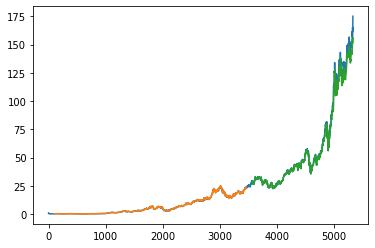

In [196]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Now let's try to plot for the future 100 data 

In [197]:
l= len(test_data)
print(l)

1868


In [198]:
x_input = test_data[(l-100):]
print(x_input[0:10])

[[0.8345398 ]
 [0.8302503 ]
 [0.83825741]
 [0.8483234 ]
 [0.85078275]
 [0.83808584]
 [0.82784819]
 [0.83162297]
 [0.83288123]
 [0.83093668]]


In [199]:
x_input = test_data[(l-100):].reshape(1,-1)
print(x_input)

[[0.8345398  0.8302503  0.83825741 0.8483234  0.85078275 0.83808584
  0.82784819 0.83162297 0.83288123 0.83093668 0.84146022 0.83911527
  0.83974441 0.83448263 0.83419665 0.83139423 0.83288123 0.85021078
  0.85141188 0.86296486 0.85764593 0.83574089 0.83768544 0.84620727
  0.85490068 0.85438587 0.84717955 0.84248966 0.84855222 0.87440352
  0.86702562 0.87091473 0.87743476 0.88115237 0.89482156 0.88578501
  0.87983695 0.85066834 0.85398556 0.84580688 0.85101149 0.84963882
  0.83402508 0.8161808  0.81898322 0.83282407 0.83842898 0.8389437
  0.83007872 0.8102899  0.81555167 0.80794495 0.81452215 0.79444733
  0.80571442 0.81080462 0.81818251 0.81595198 0.81543726 0.80800212
  0.80457057 0.82087061 0.82704749 0.83682758 0.84946725 0.85232691
  0.85358517 0.84906693 0.84878095 0.85267014 0.84998205 0.87125796
  0.85541539 0.85061118 0.85667365 0.86508107 0.86204984 0.86387998
  0.85907576 0.86119189 0.84466303 0.84437704 0.85650208 0.85655924
  0.86227857 0.87651973 0.90157033 0.91689817 0.9

In [200]:
x_input = test_data[(l-100):].reshape(1,-1)
print(x_input.shape)
list(x_input[0])[0:10]

(1, 100)


[0.8345397950728172,
 0.8302502990693806,
 0.8382574097497476,
 0.848323398441172,
 0.8507827495184382,
 0.8380858356289381,
 0.8278481927461122,
 0.8316229663871203,
 0.8328812299867845,
 0.8309366756232105]

In [201]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [202]:
temp_input[0:10]

[0.8345397950728172,
 0.8302502990693806,
 0.8382574097497476,
 0.848323398441172,
 0.8507827495184382,
 0.8380858356289381,
 0.8278481927461122,
 0.8316229663871203,
 0.8328812299867845,
 0.8309366756232105]

We'll try to predict data for next 30 days from the 100 test data values

In [203]:
len(temp_input)

100

In [204]:
outputs=[]
n_steps = 100 
i=0 
while (i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:]) #if temp inp == 101, we shift out the first value
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1) # this reshape is important aftert an np operation
        x_input = x_input.reshape(1,n_steps,1) #reshaped for lstm
        predicted=model.predict(x_input,verbose=0) 
        print("{} day output {}".format(i,predicted))
        temp_input.extend(predicted[0].tolist()) #saving predicted data
        temp_input=temp_input[1:] #shifting temp input by 1 
        #print(temp_input)
        outputs.extend(predicted.tolist()) 
        i=i+1
        
    else :
        x_input= x_input.reshape((1,n_steps,1)) #reshaping for LSTM
        predicted = model.predict(x_input,verbose=0)
        temp_input.extend(predicted[0].tolist()) #adding the prediction to temp input
        outputs.extend(predicted.tolist())
        i+=1
        
        


1 day output [[0.9226613]]
2 day output [[0.89850587]]
3 day output [[0.8680109]]
4 day output [[0.83495957]]
5 day output [[0.8011354]]
6 day output [[0.7678422]]
7 day output [[0.7361702]]
8 day output [[0.7069395]]
9 day output [[0.6806359]]
10 day output [[0.6574011]]
11 day output [[0.6370743]]
12 day output [[0.6192657]]
13 day output [[0.60344183]]
14 day output [[0.58901453]]
15 day output [[0.5754165]]
16 day output [[0.56216127]]
17 day output [[0.54888135]]
18 day output [[0.535346]]
19 day output [[0.5214603]]
20 day output [[0.5072506]]
21 day output [[0.4928385]]
22 day output [[0.4784101]]
23 day output [[0.46418336]]
24 day output [[0.45037693]]
25 day output [[0.4371843]]
26 day output [[0.42475495]]
27 day output [[0.41318336]]
28 day output [[0.4025063]]
29 day output [[0.39270762]]


In [205]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.86702562 0.87091473 0.87743476 0.88115237 0.89482156 0.88578501
 0.87983695 0.85066834 0.85398556 0.84580688 0.85101149 0.84963882
 0.83402508 0.8161808  0.81898322 0.83282407 0.83842898 0.8389437
 0.83007872 0.8102899  0.81555167 0.80794495 0.81452215 0.79444733
 0.80571442 0.81080462 0.81818251 0.81595198 0.81543726 0.80800212
 0.80457057 0.82087061 0.82704749 0.83682758 0.84946725 0.85232691
 0.85358517 0.84906693 0.84878095 0.85267014 0.84998205 0.87125796
 0.85541539 0.85061118 0.85667365 0.86508107 0.86204984 0.86387998
 0.85907576 0.86119189 0.84466303 0.84437704 0.85650208 0.85655924
 0.86227857 0.87651973 0.90157033 0.91689817 0.91958626 0.9218168
 0.92484803 0.89550785 0.91512519 0.94406498 0.94103374 0.93525717
 0.92427606 0.94417939 0.97769457 1.         0.93077713 0.9226613
 0.89850587 0.86801088 0.83495957 0.80113542 0.76784217 0.73617017
 0.70693952 0.68063593 0.65740108 0.63707429 0.61926568 0.60344183
 0.58901453 0.57541651 0.56216127 0.54888135 0.535345

In [206]:
scaler.inverse_transform(outputs)

array([[162.97668017],
       [161.55766241],
       [157.33418756],
       [152.00226956],
       [146.22338925],
       [140.30938226],
       [134.48820061],
       [128.95048694],
       [123.83963227],
       [119.24056236],
       [115.17804939],
       [111.62399668],
       [108.51023643],
       [105.74350561],
       [103.22095326],
       [100.84339687],
       [ 98.5257752 ],
       [ 96.20383898],
       [ 93.83723571],
       [ 91.4093846 ],
       [ 88.92488157],
       [ 86.40498674],
       [ 83.8822416 ],
       [ 81.39475799],
       [ 78.98076242],
       [ 76.67408866],
       [ 74.50086891],
       [ 72.47762664],
       [ 70.6107868 ],
       [ 68.89753031]])

In [207]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

import matplotlib.pyplot as plt

l=len(df2)-100
print(l)

5236


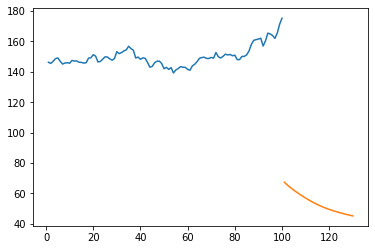

In [211]:

plt.plot(day_new,scaler.inverse_transform(df2[l:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))



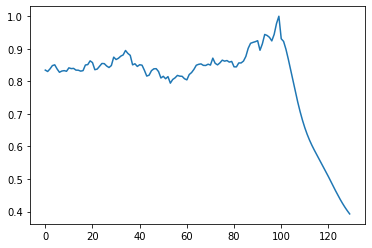

In [209]:
df3=df2.tolist()
df3.extend(outputs)
plt.plot(df3[l:])

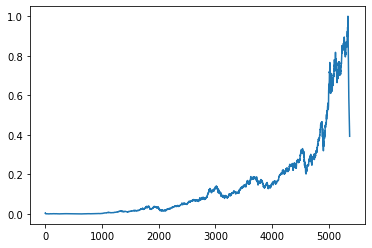

In [210]:
plt.plot(df3)

### Final Remarks 

The model isn't doing so well for some reason , but the process of going through handling time-series data is something i now have under my experience 